# **Algoritma K-Means**

## **Pengertian K-Means Clustering**
K-Menas Clustering adalah metode pengelompokan data kedalam beberapa cluster berdasarkan kesamaan karakteristiknya. Teknik ini bekerja dan memisahkan data yang berbeda kedalam lain, dengan titik pusat cluster (centorid) sebagai acuan.

## **Manfaat Clustering**

-Clustering merupakan metode segmentasi data yang sangat berguna dalam prediksi dan analisa masalah bisnis tertentu.

-Deteksi obyek diterapkan dalam sejumlah bidang, termasuk computer vision dan pengolahan gambar digital.


Clustering yang efektif akan membentuk kelompok dengan tingkat kemiripan yang tinggi di dalam satu cluster dan perbedaan yang jelas antra cluster. Kemiripan ini diukur secara numerik antara dua obyek. Semakin mirip dua obyek, semakin tinggi pula nilai kesamaannya, dan sebaliknya, Oleh karena itu, kualitas clustering sangat dipengaruhi oleh metode yang digunakan.



## **inersia (Sum Square error / SSE)**

Dalam algoritma K-Means Clustering, inersia (Sum Square error / SSE) merupakan matrik evaluasi untuk menilai seberapa baik data dikelompokkan ke dalam cluster. Matrik ini menghitung total jarak kuadrat antara setiap data dan pusat cluster (centorid) yang menjadi tempatnya.

Inersia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data


## **Silhouette Analysis**

Silhouette Analysis merupakan matrik evaluasi alternatif yang seringkali lebih unggul dibandingkan inersia dalam menilai hasil clustering, seperti pada algoritma K-Means. Hal ini karena Silhouette mempertimbangkan dua aspek sekaligus, yaitu :

- Kekompakan data dalam satu cluster
- Jarak antar cluster yang berbeda

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

In [3]:
def get_pg_data():
    conn = psycopg2.connect(
        host="farah-postgresqll.l.aivencloud.com",
        user="avnadmin",
        password="AVNS_rVI6WGJ0hdN4E7M2KsB",
        database="defaultdb",
        port=12624
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1db1966d-mmysqll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_VBsJWG-RQvJ7y8sPwxg",
        database="iris_mysql",
        port=11704
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa           1.4          0.2           4.9          3.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa          14.0          2.0          50.2         30.6
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa          14.0          2.0          40.6         30.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [4]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.23485018 -0.19762828 -0.25699912 -0.25885259]
 [ 3.28790251  2.76679588  3.59798767  3.62393628]]
Akurasi (Adjusted Rand Score): 0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.3262603  -0.32722174 -0.29029385 -0.26583613]
 [ 3.28790251  2.76679588  3.59798767  3.62393628]
 [ 2.23322302  3.30139531  0.64195857 -0.07029709]]
Akurasi (Adjusted Rand Score): 0.002

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.3262603  -0.32722174 -0.29029385 -0.26583613]
 [ 3.28657587  2.75881678  4.14007793  4.26388222]
 [ 2.23322302  3.30139531  0.64195857 -0.07029709]
 [ 3.28922916  2.77477497  3.05589741  2.98399034]]
Akurasi (Adjusted Rand Score): 0.005


## **Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

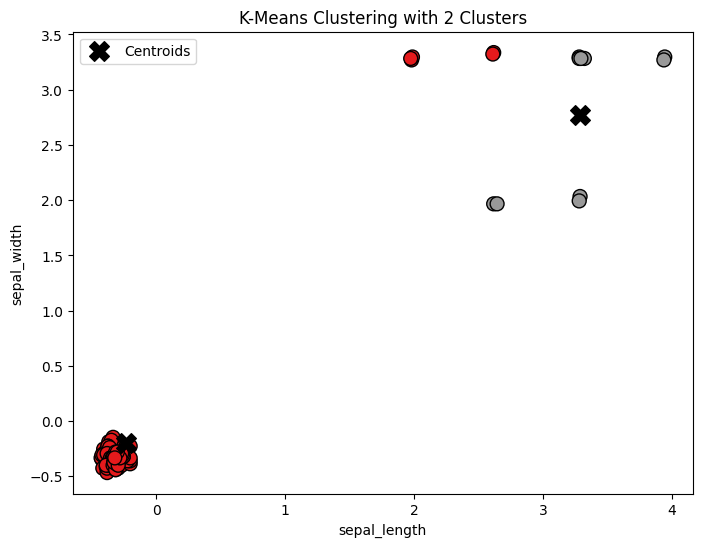

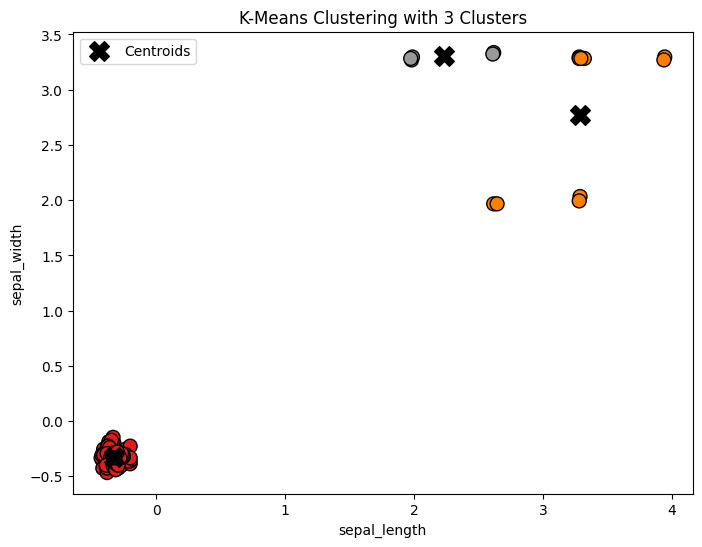

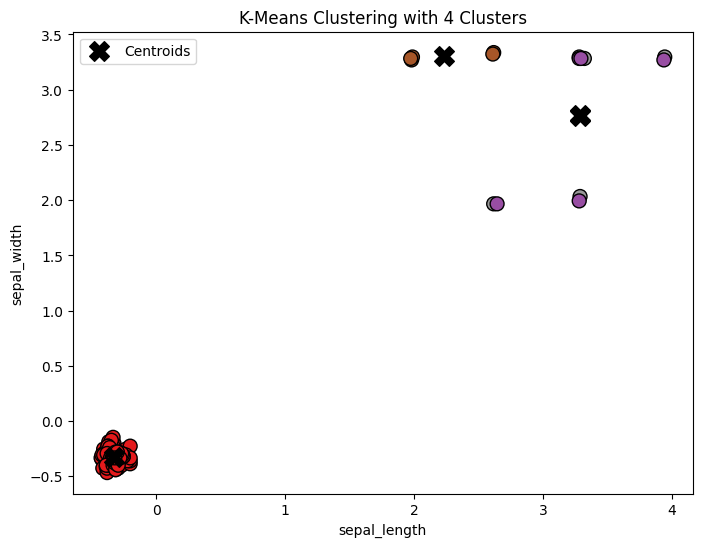

In [5]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## **Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [6]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[-0.23485018 -0.19762828 -0.25699912 -0.25885259]
 [ 3.28790251  2.76679588  3.59798767  3.62393628]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [-0.37495293 -0.26792031 -0.50407118 -0.50662387]), Klaster: 0, Centroid: [-0.23485018 -0.19762828 -0.25699912 -0.25885259], Jarak kuadrat: 0.147, Inertia sementara: 0.147
Titik data 2 (Fitur: [-0.38821934 -0.33441278 -0.50407118 -0.50662387]), Klaster: 0, Centroid: [-0.23485018 -0.19762828 -0.25699912 -0.25885259], Jarak kuadrat: 0.165, Inertia sementara: 0.312
Titik data 3 (Fitur: [-0.40148575 -0.30781579 -0.51316665 -0.50662387]), Klaster: 0, Centroid: [-0.23485018 -0.19762828 -0.25699912 -0.25885259], Jarak kuadrat: 0.167, Inertia sementara: 0.479
Titik data 4 (Fitur: [ 2.61662223  3.3359714   0.64195857 -0.07029709]), Klaster: 0, Centroid: [-0.23485018 -0.19762828 -0.25699912 -0.25885259], Jarak kuadrat: 21.461, Inertia sementara: 21.939
Titik da

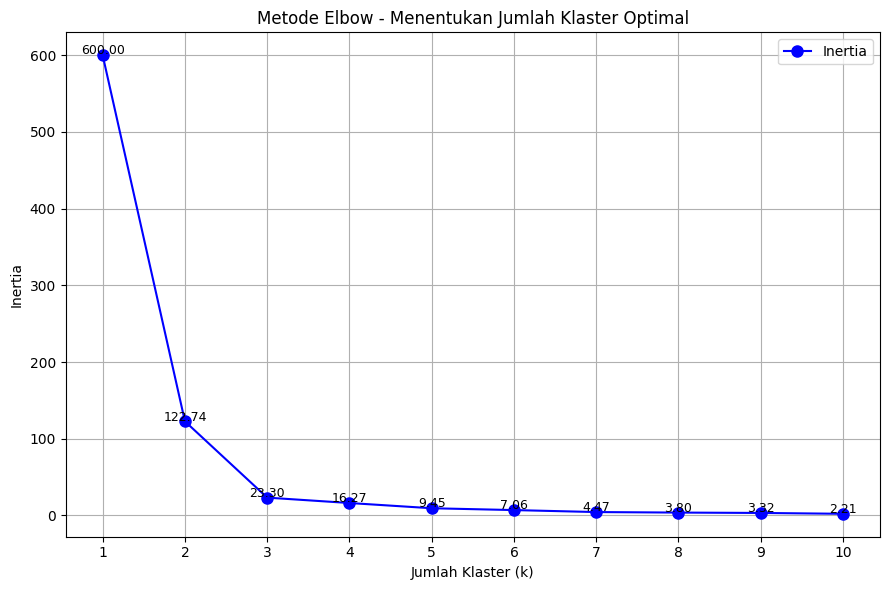

In [7]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[-0.23485018 -0.19762828 -0.25699912 -0.25885259]
 [ 3.28790251  2.76679588  3.59798767  3.62393628]]
Silhouette Score untuk 2 klaster: 0.898

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.3262603  -0.32722174 -0.29029385 -0.26583613]
 [ 3.28790251  2.76679588  3.59798767  3.62393628]
 [ 2.23322302  3.30139531  0.64195857 -0.07029709]]
Silhouette Score untuk 3 klaster: 0.914

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.3262603  -0.32722174 -0.29029385 -0.26583613]
 [ 3.28657587  2.75881678  4.14007793  4.26388222]
 [ 2.23322302  3.30139531  0.64195857 -0.07029709]
 [ 3.28922916  2.77477497  3.05589741  2.98399034]]
Silhouette Score untuk 4 klaster: 0.895

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 3 (dengan score = 0.914)


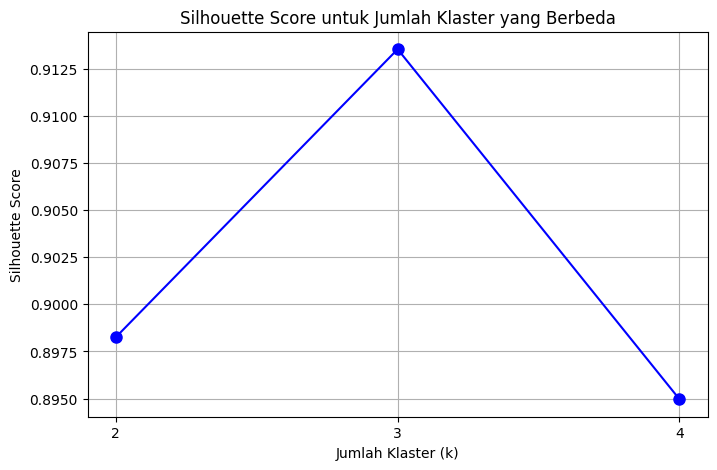

In [8]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()